In [ ]:
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import numpy as np
import math

## XML data imports and assigns to functions (not finished) 

In [ ]:
model_path = '/home/taranto/PX4-Autopilot/Tools/sitl_gazebo/models/plane/plane.sdf.jinja'

tree = ET.parse(model_path)
root = tree.getroot()
# looks at the right wing element 
plugin_right_wing = root.find(".//plugin[@name='right_wing']")

In [ ]:
# extracts from the xml file the values i want
a0 = plugin_right_wing.find('a0').text
cla = plugin_right_wing.find('cla').text
cda = plugin_right_wing.find('cda').text
cma = plugin_right_wing.find('cma').text
alpha_stall = plugin_right_wing.find('alpha_stall').text
cla_stall = plugin_right_wing.find('cla_stall').text
cda_stall = plugin_right_wing.find('cda_stall').text
cma_stall = plugin_right_wing.find('cma_stall').text

# initial angle of attack also the y intercept of the alpha lift coeff. curve
print(f"a0: {a0}")
# angle of attack at stall point the PEAK angle of attack
print(f"alpha_stall: {alpha_stall}")
# ratio of C_l and slpha slope before stall
print(f"cla: {cla}")
# ratio of C_l and alpha slope after stall sloe of the second portion of the alpha lift
print(f"cla_stall: {cla_stall}")

In [ ]:
a0 = float(a0)
alpha_stall = float(alpha_stall)
cla = float(cla)
cla_stall = float(cla_stall)
alpha_stall = np.rad2deg(alpha_stall)

## Explicit data

In [ ]:
# a0: The initial "alpha" or initial angle of attack. a0 is also the y-intercept of the alpha-lift coefficient curve.
a0 = 0.05984281113
# cla: The ratio of the coefficient of lift and alpha slope before stall. Slope of the first portion of the alpha-lift coefficient curve.
cla = 4.752798721
# cda: The ratio of the coefficient of drag and alpha slope before stall.
cda = 0.6417112299
# alpha_stall: Angle of attack at stall point; the peak angle of attack.
alpha_stall = np.rad2deg(0.3391428111)
# cla_stall: The ratio of coefficient of lift and alpha slope after stall. Slope of the second portion of the alpha-lift coefficient curve.
cla_stall = -3.85
# cda_stall: The ratio of coefficient of drag and alpha slope after stall.
cda_stall = -0.9233984055
area = 0.6
air_density = 1.2041
print(f"alpha_knot: {a0} \ncla: {cla} \ncda: {cda} \nalpha_stall: {alpha_stall} \ncla_stall: {cla_stall} \ncda_stall: {cda_stall} ")

In [ ]:
def plot_lift_coefficient_vs_angle_of_attack(alpha_l):
    """
    Plot the coefficient of lift vs angle of attack.

    :param alpha_l: The lift curve slope in per radian.
    """
    # Generate a range of angles of attack from -10 to 20 degrees
    alpha_deg = np.linspace(-10, 20, 100)
    alpha_rad = alpha_deg * np.pi / 180.0

    # Calculate the corresponding coefficient of lift for each angle of attack
    cl = alpha_rad * alpha_l

    # Create the plot
    fig, ax = plt.subplots()
    ax.plot(alpha_deg, cl)
    plt.axvline(x=alpha_stall, color='r', linestyle='--')
    ax.set_xlabel('Angle of attack (deg)')
    ax.set_ylabel('Coefficient of lift')
    ax.set_title('C_L vs α')
    ax.grid(True)
    # Show the plot
    plt.show()
    
plot_lift_coefficient_vs_angle_of_attack(cla)

In [ ]:
def plot_lift_vs_airspeed(cl, s, rho, airspeed):
    """
    Plot the lift vs airspeed.

    :param cl: The coefficient of lift.
    :param s: The wing area in square meters.
    :param rho: The air density in kg/m^3.
    :param airspeed: List of airspeed values in m/s.
    """
    # Calculate the corresponding lift values for each airspeed
    lift = [0.5 * rho * v**2 * s * cl for v in airspeed]

    # Create the plot
    fig, ax = plt.subplots()
    ax.plot(airspeed, lift)
    ax.set_xlabel('Airspeed (m/s)')
    ax.set_ylabel('Lift (N)')
    ax.set_title('Lift vs Airspeed')
    ax.grid(True)

    # Show the plot
    plt.show()

In [ ]:
airspeed = np.linspace(0, 100, 101)
plot_lift_vs_airspeed(cla, area, air_density, airspeed)

In [ ]:
def calculate_coefficient_of_lift(cla, a0, alpha):
    """
    Calculate the coefficient of lift for a given angle of attack.
    :param cla: The ratio of the coefficient of lift and alpha slope before stall.
    :param a0: The initial angle of attack.
    :param alpha: The angle of attack.
    :return: The coefficient of lift.
    """
    cl = cla * (alpha - a0)
    return cl

In [ ]:
# calculate_coefficient_of_lift(cla, a0, alpha)
print(alpha)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
a0 = 0.05984281113
cla = 4.752798721
cda = 0.6417112299
alpha_stall = np.rad2deg(0.3391428111)
cla_stall = -3.85
cda_stall = -0.9233984055
area = 0.6
air_density = 1.2041
g = 9.81

def plot_load_factor_vs_airspeed():
    # Calculate maximum lift coefficient before stall
    cl_max = cla * (alpha_stall - a0)

    # Calculate maximum load factor at various airspeeds
    v_max_array = np.linspace(0, 150, 100)  # Maximum airspeed array
    n_max_array = (0.5 * air_density * v_max_array**2 * cl_max) / (g)

    # Plot load factor vs airspeed
    plt.plot(v_max_array, n_max_array)
    plt.xlabel('Airspeed (m/s)')
    plt.ylabel('Load Factor')
    plt.title('Flight Envelope')
    plt.show()


In [ ]:
plot_load_factor_vs_airspeed()

In [ ]:
a0 = 0.05984281113
cla = 4.752798721
cda = 0.6417112299
alpha_stall = np.rad2deg(0.3391428111)
cla_stall = -3.85
cda_stall = -0.9233984055
area = 0.6
air_density = 1.2041
g = 9.81

In [73]:
import numpy as np

def lift_coefficient(alpha, a0, cla, alpha_stall, cla_stall):
    if alpha < alpha_stall:
        Cl = cla * (alpha - a0)
    else:
        Cl = cla_stall * (alpha - a0) + (cla_stall - cla) * alpha_stall
    return Cl

def drag_coefficient(alpha, a0, cda, alpha_stall, cda_stall):
    if alpha < alpha_stall:
        Cd = cda * (alpha - a0)
    else:
        Cd = cda_stall * (alpha - a0) + (cda_stall - cda) * alpha_stall
    return Cd


In [76]:
alpha = np.deg2rad(5)  # angle of attack in radians
a0 = 0.05984281113
cla = 4.752798721
cda = 0.6417112299
alpha_stall = np.deg2rad(20)
cla_stall = -3.85
cda_stall = -0.9233984055

Cl = lift_coefficient(alpha, a0, cla, alpha_stall, cla_stall)
Cd = drag_coefficient(alpha, a0, cda, alpha_stall, cda_stall)

print(f"Lift coefficient: {Cl:.3f}")
print(f"Drag coefficient: {Cd:.3f}")


Lift coefficient: 0.130
Drag coefficient: 0.018


In [77]:
import matplotlib.pyplot as plt

def plot_coefficients(a0, cla, cda, alpha_stall, cla_stall, cda_stall):
    alpha_range = np.linspace(-10, 30, 1000)
    alpha_rad = np.deg2rad(alpha_range)

    Cl = [lift_coefficient(alpha, a0, cla, alpha_stall, cla_stall) for alpha in alpha_rad]
    Cd = [drag_coefficient(alpha, a0, cda, alpha_stall, cda_stall) for alpha in alpha_rad]

    plt.plot(alpha_range, Cl, label="Lift Coefficient")
    plt.plot(alpha_range, Cd, label="Drag Coefficient")
    plt.legend()
    plt.xlabel("Angle of Attack (degrees)")
    plt.ylabel("Coefficient")
    plt.show()


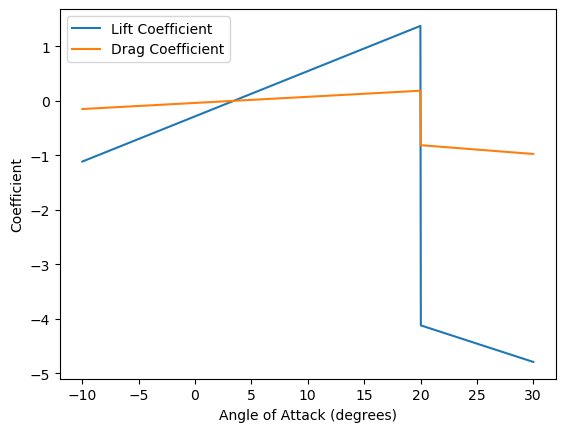

In [78]:
a0 = 0.05984281113
cla = 4.752798721
cda = 0.6417112299
alpha_stall = np.deg2rad(20)
cla_stall = -3.85
cda_stall = -0.9233984055

plot_coefficients(a0, cla, cda, alpha_stall, cla_stall, cda_stall)


In [ ]:
plt.plot(a0, alpha_stall, '-bo')
plt.xlim(-15,45)
plt.xlabel('Angle of Attack (degrees)')
plt.ylim(-2,2) 
plt.ylabel('Coefficient of Lift')
plt.title('Alpha Lift Curve')
plt.axvline(x=alpha_stall, color='r', linestyle='--')
plt.grid(True)
plt.show()